News Headlines NLP Lab: Bag-of-Words and Document Similarity
Objective

Analyze a collection of news headlines by building a Bag-of-Words representation to extract features, explore word frequency, and compute document similarity.
Dataset

Use the following list of news headlines:

headlines = [
    "AI outperforms doctors in diagnosing rare diseases",\
    "Stock markets hit new record highs amid global optimism",\
    "New vaccine shows promise in early trials",\
    "Climate change impacts agriculture across multiple continents",\
    "Scientists develop biodegradable plastic from seaweed",\
    "Sports teams adapt strategies with big data analytics",\
    "Electric vehicles set new sales record worldwide",\
    "Breakthrough in quantum computing boosts encryption security"
]

Tasks

    Preprocessing
        Write a function to lowercase all text, remove punctuation, and normalize whitespace in each headline.
    Bag-of-Words Analysis
        Use scikit-learn’s CountVectorizer with stop word removal and vocabulary limited to 50 words.
        Fit and transform the preprocessed headlines into a Bag-of-Words matrix.
        Display the vocabulary, shape, and sparsity of the matrix.
    Word Frequency and Visualization
        Compute total word frequency across all headlines.
        Plot the top 10 most frequent words using matplotlib or seaborn.
    Document Similarity
        Calculate cosine similarity between headline vectors.
        Display the similarity matrix in tabular form.
        Identify the two most similar headlines and explain their similarity based on shared vocabulary.

Deliverables

    A notebook implementing the preprocessing function and Bag-of-Words construction.
    Printed output showing vocabulary and matrix characteristics.
    A bar chart of the top 10 words by frequency.
    A similarity matrix with highlighted most similar headline pairs.
    A short commentary explaining the results.

This exercise provides hands-on experience with core NLP techniques including text cleaning, feature extraction via Bag-of-Words, and comparing documents using cosine similarity on vectorized features.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

In [3]:
headlines = [
    "AI outperforms doctors in diagnosing rare diseases",
    "Stock markets hit new record highs amid global optimism",
    "New vaccine shows promise in early trials",
    "Climate change impacts agriculture across multiple continents",
    "Scientists develop biodegradable plastic from seaweed",
    "Sports teams adapt strategies with big data analytics",
    "Electric vehicles set new sales record worldwide",
    "Breakthrough in quantum computing boosts encryption security"
]

print("Sample Headlines for Vectorization:")
print("=" * 50)
for i, doc in enumerate(headlines, 1):
    print(f"{i}. {doc}")

Sample Headlines for Vectorization:
1. AI outperforms doctors in diagnosing rare diseases
2. Stock markets hit new record highs amid global optimism
3. New vaccine shows promise in early trials
4. Climate change impacts agriculture across multiple continents
5. Scientists develop biodegradable plastic from seaweed
6. Sports teams adapt strategies with big data analytics
7. Electric vehicles set new sales record worldwide
8. Breakthrough in quantum computing boosts encryption security


In [4]:
# Preprocessing
def simple_preprocess(text):
    """Basic text preprocessing for vectorization"""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Preprocess documents
processed_headlines = [simple_preprocess(headline) for headline in headlines]
print(f"\nPreprocessed Documents:")
for i, headline in enumerate(processed_headlines, 1):
    print(f"{i}. {headline}")


Preprocessed Documents:
1. ai outperforms doctors in diagnosing rare diseases
2. stock markets hit new record highs amid global optimism
3. new vaccine shows promise in early trials
4. climate change impacts agriculture across multiple continents
5. scientists develop biodegradable plastic from seaweed
6. sports teams adapt strategies with big data analytics
7. electric vehicles set new sales record worldwide
8. breakthrough in quantum computing boosts encryption security


BAG-OF-WORDS ANALYSIS
Vocabulary size: 49
Matrix shape: (8, 49)
Matrix density: 0.133

First 10 features:
       adapt  agriculture  ai  amid  analytics  big  biodegradable  boosts  \
Doc 1      0            0   1     0          0    0              0       0   
Doc 2      0            0   0     1          0    0              0       0   
Doc 3      0            0   0     0          0    0              0       0   
Doc 4      0            1   0     0          0    0              0       0   
Doc 5      0            0   0     0          0    0              1       0   
Doc 6      1            0   0     0          1    1              0       0   
Doc 7      0            0   0     0          0    0              0       0   
Doc 8      0            0   0     0          0    0              0       1   

       breakthrough  change  
Doc 1             0       0  
Doc 2             0       0  
Doc 3             0       0  
Doc 4             0       1  
Doc 5             0       0  
Doc 6      

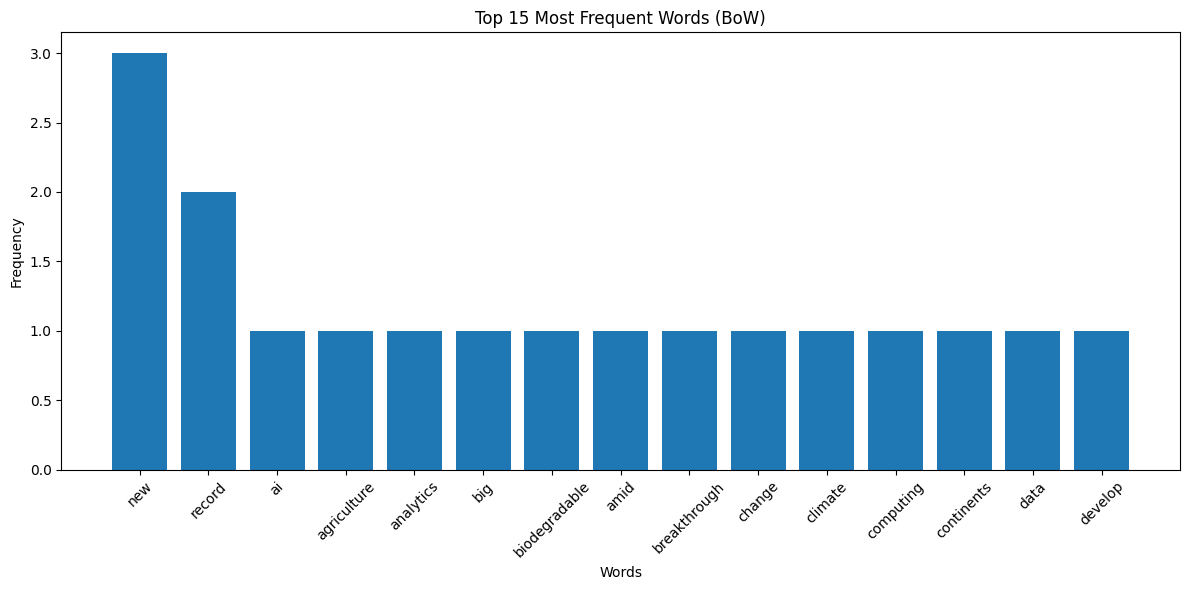


Document Similarity Matrix (Cosine Similarity):
       Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8
Doc 1    1.0  0.000  0.000    0.0    0.0    0.0  0.000    0.0
Doc 2    0.0  1.000  0.136    0.0    0.0    0.0  0.252    0.0
Doc 3    0.0  0.136  1.000    0.0    0.0    0.0  0.154    0.0
Doc 4    0.0  0.000  0.000    1.0    0.0    0.0  0.000    0.0
Doc 5    0.0  0.000  0.000    0.0    1.0    0.0  0.000    0.0
Doc 6    0.0  0.000  0.000    0.0    0.0    1.0  0.000    0.0
Doc 7    0.0  0.252  0.154    0.0    0.0    0.0  1.000    0.0
Doc 8    0.0  0.000  0.000    0.0    0.0    0.0  0.000    1.0


In [7]:
# Bag-of-Words with scikit-learn CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(
    lowercase=True,          # Convert to lowercase
    stop_words='english',    # Remove common English stop words
    max_features=50,        # Limit vocabulary size
    ngram_range=(1, 1)       # Use single words (unigrams)
)

# Fit and transform documents
bow_matrix = vectorizer.fit_transform(processed_headlines)
feature_names = vectorizer.get_feature_names_out()

print("BAG-OF-WORDS ANALYSIS")
print("=" * 50)
print(f"Vocabulary size: {len(feature_names)}")
print(f"Matrix shape: {bow_matrix.shape}")
print(f"Matrix density: {bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1]):.3f}")

# Convert to dense array for visualization
bow_dense = bow_matrix.toarray()

# Create DataFrame for better visualization
bow_df = pd.DataFrame(bow_dense, columns=feature_names)
bow_df.index = [f"Doc {i+1}" for i in range(len(headlines))]

print(f"\nFirst 10 features:")
print(bow_df.iloc[:, :10])

# Analyze vocabulary
print(f"\nVocabulary (first 20 words):")
print(list(feature_names[:20]))

# Word frequency analysis
word_freq = bow_matrix.sum(axis=0).A1  # Sum across documents
word_freq_df = pd.DataFrame({
    'word': feature_names,
    'frequency': word_freq
}).sort_values('frequency', ascending=False)

print(f"\nTop 15 most frequent words:")
print(word_freq_df.head(15))

# Visualize word frequencies
plt.figure(figsize=(12, 6))
top_words = word_freq_df.head(15)
plt.bar(top_words['word'], top_words['frequency'])
plt.title('Top 15 Most Frequent Words (BoW)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Document similarity using BoW
similarity_matrix = cosine_similarity(bow_matrix)
similarity_df = pd.DataFrame(similarity_matrix,
                           index=[f"Doc {i+1}" for i in range(len(headlines))],
                           columns=[f"Doc {i+1}" for i in range(len(headlines))])

print(f"\nDocument Similarity Matrix (Cosine Similarity):")
print(similarity_df.round(3))